<a href="https://colab.research.google.com/github/rahiakela/opencv-projects-and-guide/blob/main/mastering-opencv4-with-python/5-image-processing-techniques/1_image_channels_splitting_and_merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image channels splitting and merging

Sometimes, you have to work with specific channels on multichannel images. To do this, you have to split the multichannel image into several single-channel images. Additionally, once the processing has been done, you may want to create one multichannel image from different single-channel images. In order to both split and merge channels, you can use the `cv2.split()` and `cv2.merge()` functions, respectively. 

- The cv2.split() function splits the source multichannel image into several single-channel images.
- The cv2.merge() function merges several single-channel images into a multichannel image.

## Setup

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
%%shell

wget https://raw.githubusercontent.com/rahiakela/opencv-projects-and-guide/main/mastering-opencv4-with-python/5-image-processing-techniques/images/color_spaces.png

In [3]:
def show_with_matplotlib(color_img, title, pos):
  """Shows an image using matplotlib capabilities"""

  # Convert BGR image to RGB
  img_RGB = color_img[:, :, ::-1]

  ax = plt.subplot(3, 6, pos)
  plt.imshow(img_RGB)
  plt.title(title)
  plt.axis('off')

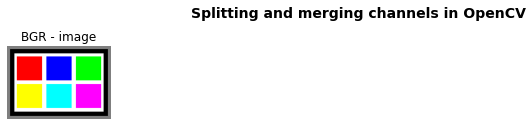

In [4]:
# Load the original image
image = cv2.imread("color_spaces.png")

# create a figure() object with appropriate size and title
plt.figure(figsize=(13, 5))
plt.suptitle("Splitting and merging channels in OpenCV", fontsize=14, fontweight="bold")

show_with_matplotlib(image, "BGR - image", 1)

## Split the image

Using the `cv2.split()` function, if you want to get the three channels from a loaded BGR image.

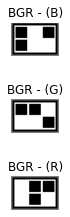

In [6]:
# Split the image into its three components (blue, green and red):
(b, g, r) = cv2.split(image)

# Show all the channels from the BGR image
show_with_matplotlib(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR - (B)", 2)
show_with_matplotlib(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR - (G)", 2 + 6)
show_with_matplotlib(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR - (R)", 2 + 6 * 2)

## Merge the image

Using the `cv2.merge()` function, if you want to build the BGR image again from its three channels.

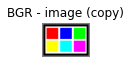

In [7]:
# Merge the three channels again to build a BGR image
image_copy = cv2.merge((b, g, r))

show_with_matplotlib(image_copy, "BGR - image (copy)", 1 + 6)

You should remember that cv2.split() is a time-consuming operation, and so you
should only use it if strictly necessary; otherwise, you can use the NumPy functionality to work with specific channels. 

For example, if you want to get the blue channel of the image,
you can do the following:

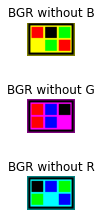

In [8]:
b_copy = image[:, :, 0]

# We make a copy of the loaded image
image_without_blue = image.copy()
# From the BGR image, we "eliminate" (set to 0) the blue component (channel 0)
image_without_blue[:, :, 0] = 0

# From the BGR image, we "eliminate" (set to 0) the green component (channel 1)
image_without_green = image.copy()
image_without_green[:, :, 1] = 0

# From the BGR image, we "eliminate" (set to 0) the red component (channel 2)
image_without_red = image.copy()
image_without_red[:, :, 2] = 0

show_with_matplotlib(image_without_blue, "BGR without B", 3)
show_with_matplotlib(image_without_green, "BGR without G", 3 + 6)
show_with_matplotlib(image_without_red, "BGR without R", 3 + 6 * 2)

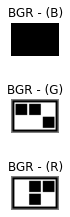

In [9]:
# Split the 'image_without_blue' image into its three components (blue, green and red)
(b, g, r) = cv2.split(image_without_blue)

show_with_matplotlib(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR - (B)", 2)
show_with_matplotlib(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR - (G)", 2 + 6)
show_with_matplotlib(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR - (R)", 2 + 6 * 2)

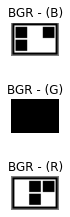

In [10]:
# Split the 'image_without_green' image into its three components (blue, green and red)
(b, g, r) = cv2.split(image_without_green)

show_with_matplotlib(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR - (B)", 5)
show_with_matplotlib(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR - (G)", 5 + 6)
show_with_matplotlib(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR - (R)", 5 + 6 * 2)

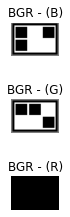

In [11]:
# Split the 'image_without_red' image into its three components (blue, green and red)
(b, g, r) = cv2.split(image_without_red)

show_with_matplotlib(cv2.cvtColor(b, cv2.COLOR_GRAY2BGR), "BGR - (B)", 6)
show_with_matplotlib(cv2.cvtColor(g, cv2.COLOR_GRAY2BGR), "BGR - (G)", 6 + 6)
show_with_matplotlib(cv2.cvtColor(r, cv2.COLOR_GRAY2BGR), "BGR - (R)", 6 + 6 * 2)